# n_armed_bandit_problem

###  (1) With greedy & $\epsilon$-greedy method ( $\epsilon$ = 0.1, 0.01 )

Populating the interactive namespace from numpy and matplotlib


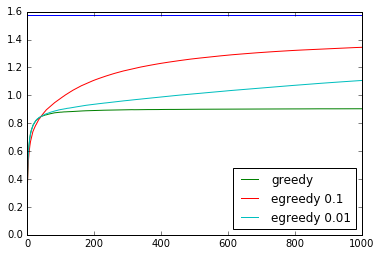

In [22]:
import random
import matplotlib.pyplot as plt
%pylab inline --no-import-all
#initialize
time = 1000
task = 2000
q = []
n_method = 3
tau = 0.1
for i in range(10):
    q.append(random.gauss(0, 1))
#a_elements = range(10)
#A = []#elements of A is the action chosen #A[t]
#K = [0.0]*10 # K(a) counter of action a
#R = [0.0]*10 # R(a) sum of the reward of a
#Q = [0.0]*10 
qm = max(q)
Rt = [[[0.0 for i in range(time)] for j in range(task)] for k in range(n_method)] 
e = 0.1
         
def random_pick(Probility_Variable, Probility):
    x = random.uniform(0, 1)
    cumu_prob = 0.0
    for item, prob in zip(Probility_Variable, Probility):
        cumu_prob += prob
        if x < cumu_prob :break
    return item

def Qt(K_a, R_a, q_a):
    K_a += 1
    R_a += random.gauss(q_a, 1)
    Q_a = R_a/K_a
    return K_a, R_a, Q_a

def greedy(t, task, method):
    K = [0.0]*10
    R = [0.0]*10
    Q = [0.0]*10
    for ti in range(t):
        if ti < 1:
            act = random_pick(range(10), [0.1]*10)
            K[act], R[act], Q[act] = Qt(K[act], R[act], q[act])
        else:
            act = Q.index(max(Q))#list index & max min
            K[act], R[act], Q[act] = Qt(K[act], R[act], q[act])
        Rt[method][task][ti] = sum(R)/(ti+1)


def egreedy(t, e, task, method):
    K = [0.0]*10
    R = [0.0]*10
    Q = [0.0]*10
    for ti in range(t):
        if ti < 1 or random_pick([True, False],[e, 1-e]):
            act = random_pick(range(10), [0.1]*10)
            K[act], R[act], Q[act] = Qt(K[act], R[act], q[act])
        else:
            act = Q.index(max(Q))#list index & max min
            K[act], R[act], Q[act] = Qt(K[act], R[act], q[act])
        Rt[method][task][ti] = sum(R)/(ti+1)

#using greedy method
for k in range(task):    
    greedy(time, k, 0)

    egreedy(time, 0.1, k, 1)

    egreedy(time, 0.01, k, 2)


for method_ in range(n_method):
    for ti in range(time):
        for task_ in range(1,task):
            Rt[method_][0][ti] += Rt[method_][task_][ti]
        Rt[method_][0][ti] = Rt[method_][0][ti]/task

plt.plot(range(time), [qm]*time)
plt.plot(range(time), Rt[0][0][:], label = "greedy")
plt.plot(range(time), Rt[1][0][:], label = "egreedy 0.1")
plt.plot(range(time), Rt[2][0][:], label = "egreedy 0.01")


plt.legend(loc="lower right")

### (2) Create a class of (1)

Populating the interactive namespace from numpy and matplotlib


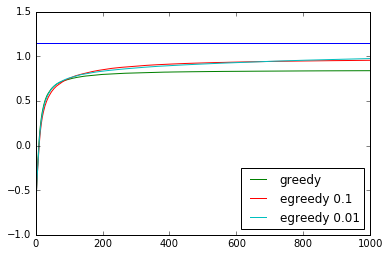

In [9]:
# -*- coding: UTF-8 -*-
import random
import matplotlib.pyplot as plt
%pylab inline --no-import-all
#initialize
class n_armed_bandit:
    n = 10 #arm
    time = 1000
    task = 2000
    q = []
    n_method = 3
    tau = 0.1
    Rt = []
    qm = 0
    
    def __init__(self):
        for i in range(n_armed_bandit.n):
            n_armed_bandit.q.append(random.gauss(0, 1))
        n_armed_bandit.qm = max(n_armed_bandit.q)
        n_armed_bandit.Rt = [[[0.0 for i in range(n_armed_bandit.time)] for j in range(n_armed_bandit.task)] for k in range(n_armed_bandit.n_method)]
        
    def random_pick(self, Probility_Variable, Probility):
        x = random.uniform(0, 1)
        cumu_prob = 0.0
        for item, prob in zip(Probility_Variable, Probility):
            cumu_prob += prob
            if x < cumu_prob :break
        return item

    def Qt(self, K_a, R_a, q_a):
        K_a += 1
        R_a += random.gauss(q_a, 1)
        Q_a = R_a/K_a
        return K_a, R_a, Q_a

    def greedy(self, t, task, method):
        K = [0.0]*n_armed_bandit.n
        R = [0.0]*n_armed_bandit.n
        Q = [0.0]*n_armed_bandit.n
        for ti in range(t):
            if ti < 1:
                act = self.random_pick(range(10), [0.1]*10)
                K[act], R[act], Q[act] = self.Qt(K[act], R[act], self.q[act])
            else:
                act = Q.index(max(Q))#list index & max min
                K[act], R[act], Q[act] = self.Qt(K[act], R[act], self.q[act])
            n_armed_bandit.Rt[method][task][ti] = sum(R)/(ti+1)

    def egreedy(self, t, e, task, method):
        K = [0.0]*n_armed_bandit.n
        R = [0.0]*n_armed_bandit.n
        Q = [0.0]*n_armed_bandit.n
        for ti in range(t):
            if ti < 1 or self.random_pick([True, False],[e, 1-e]):
                act = self.random_pick(range(n_armed_bandit.n), [1.0/n_armed_bandit.n]*n_armed_bandit.n)
                K[act], R[act], Q[act] = self.Qt(K[act], R[act], self.q[act])
            else:
                act = Q.index(max(Q))#list index & max min
                K[act], R[act], Q[act] = self.Qt(K[act], R[act], self.q[act])
            n_armed_bandit.Rt[method][task][ti] = sum(R)/(ti+1)

#a_elements = range(10)
#A = []#elements of A is the action chosen #A[t]
#K = [0.0]*10 # K(a) counter of action a
#R = [0.0]*10 # R(a) sum of the reward of a
#Q = [0.0]*10 

 
e = 0.1
         
        
def softmax(t, tau, task, method):
    K = [0.0]*10
    R = [0.0]*10
    Q = [0.0]*10
solver = n_armed_bandit()
#using greedy method
for k in range(solver.task):    
    solver.greedy(solver.time, k, 0)

    solver.egreedy(solver.time, 0.1, k, 1)

    solver.egreedy(solver.time, 0.01, k, 2)


for method_ in range(solver.n_method):
    for ti in range(solver.time):
        for task_ in range(1,solver.task):
            solver.Rt[method_][0][ti] += solver.Rt[method_][task_][ti]
        solver.Rt[method_][0][ti] = solver.Rt[method_][0][ti]/solver.task

plt.plot(range(solver.time), [solver.qm]*solver.time)
plt.plot(range(solver.time), solver.Rt[0][0][:], label = "greedy")
plt.plot(range(solver.time), solver.Rt[1][0][:], label = "egreedy 0.1")
plt.plot(range(solver.time), solver.Rt[2][0][:], label = "egreedy 0.01")


plt.legend(loc="lower right")

###  (3) With greedy & $\epsilon$-greedy method ( $\epsilon$ = 0.1 ) & softmax method ( $\tau$ = 23 )

Populating the interactive namespace from numpy and matplotlib


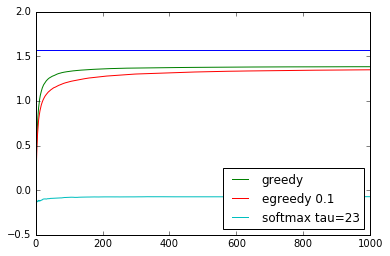

In [11]:
# -*- coding: UTF-8 -*-
import random, math
import matplotlib.pyplot as plt
%pylab inline --no-import-all
#initialize
class n_armed_bandit:
    n = 10 #arm
    time = 1000
    task = 2000
    q = []
    n_method = 3
    tau = 23
    Rt = []
    qm = 0
    
    def __init__(self):
        for i in range(self.n):
            self.q.append(random.gauss(0, 1))
        self.qm = max(self.q)
        self.Rt = [[[0.0 for i in range(self.time)] for j in range(self.task)] for k in range(self.n_method)]
        
    def random_pick(self, Probility_Variable, Probility):
        x = random.uniform(0, 1)
        cumu_prob = 0.0
        for item, prob in zip(Probility_Variable, Probility):
            cumu_prob += prob
            if x < cumu_prob :break
        return item

    def Qt(self, K_a, R_a, q_a):
        K_a += 1
        R_a += random.gauss(q_a, 1)
        Q_a = R_a/K_a
        return K_a, R_a, Q_a

    def greedy(self, t, task, method):
        K = [0.0]*self.n
        R = [0.0]*self.n
        Q = [0.0]*self.n
        for ti in range(t):
            if ti < 1:
                act = self.random_pick(range(10), [0.1]*10)
                K[act], R[act], Q[act] = self.Qt(K[act], R[act], self.q[act])
            else:
                act = Q.index(max(Q))#list index & max min
                K[act], R[act], Q[act] = self.Qt(K[act], R[act], self.q[act])
            self.Rt[method][task][ti] = sum(R)/(ti+1)

    def egreedy(self, t, e, task, method):
        K = [0.0]*self.n
        R = [0.0]*self.n
        Q = [0.0]*self.n
        for ti in range(t):
            if ti < 1 or self.random_pick([True, False],[e, 1-e]):
                act = self.random_pick(range(self.n), [1.0/self.n]*self.n)
                K[act], R[act], Q[act] = self.Qt(K[act], R[act], self.q[act])
            else:
                act = Q.index(max(Q))#list index & max min
                K[act], R[act], Q[act] = self.Qt(K[act], R[act], self.q[act])
            self.Rt[method][task][ti] = sum(R)/(ti+1)

    def softmax(self, t, task, method):
        K = [0.0]*self.n
        R = [0.0]*self.n
        Q = [0.0]*self.n
        Gibbs = [1.0/self.n]*self.n
        for ti in range(t):
            act = self.random_pick(range(self.n), Gibbs)
            K[act], R[act], Q[act] = self.Qt(K[act], R[act], self.q[act])
            Gibbs = self.calcGibbs(Q)
            self.Rt[method][task][ti] = sum(R)/(ti+1)
            
    def calcGibbs(self, Q):
        temp = [math.exp(Q[i]/self.tau) for i in range(self.n)]
        sumt = sum(temp)
        G = [temp[i]/sumt for i in range(self.n)]
        return G
#a_elements = range(10)
#A = []#elements of A is the action chosen #A[t]
#K = [0.0]*10 # K(a) counter of action a
#R = [0.0]*10 # R(a) sum of the reward of a
#Q = [0.0]*10 

 
e = 0.1
         
        

solver = n_armed_bandit()
#using greedy method
for k in range(solver.task):    
    solver.greedy(solver.time, k, 0)

    #solver.egreedy(solver.time, 0.1, k, 1)

    solver.softmax(solver.time, k, 2)
    

for method_ in range(solver.n_method):
    for ti in range(solver.time):
        for task_ in range(1,solver.task):
            solver.Rt[method_][0][ti] += solver.Rt[method_][task_][ti]
        solver.Rt[method_][0][ti] = solver.Rt[method_][0][ti]/solver.task

plt.plot(range(solver.time), [solver.qm]*solver.time)
plt.plot(range(solver.time), solver.Rt[0][0][:], label = "greedy")
plt.plot(range(solver.time), solver.Rt[1][0][:], label = "egreedy 0.1")
plt.plot(range(solver.time), solver.Rt[2][0][:], label = "softmax tau=23")


plt.legend(loc="lower right")

###  (4) With greedy & softmax method ( $\tau$ = 0.1 )

Populating the interactive namespace from numpy and matplotlib


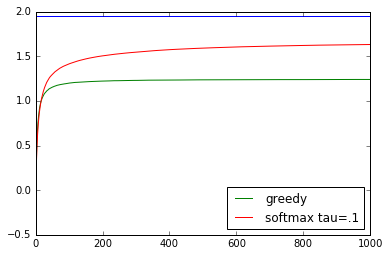

In [15]:
# -*- coding: UTF-8 -*-
import random, math
import matplotlib.pyplot as plt
%pylab inline --no-import-all
#initialize
class n_armed_bandit:
    n = 10 #arm
    time = 1000
    task = 2000
    q = []
    n_method = 2
    tau = 0.1
    Rt = []
    qm = 0
    
    def __init__(self):
        for i in range(self.n):
            self.q.append(random.gauss(0, 1))
        self.qm = max(self.q)
        self.Rt = [[[0.0 for i in range(self.time)] for j in range(self.task)] for k in range(self.n_method)]
        
    def random_pick(self, Probility_Variable, Probility):
        x = random.uniform(0, 1)
        cumu_prob = 0.0
        for item, prob in zip(Probility_Variable, Probility):
            cumu_prob += prob
            if x < cumu_prob :break
        return item

    def Qt(self, K_a, R_a, q_a):
        K_a += 1
        R_a += random.gauss(q_a, 1)
        Q_a = R_a/K_a
        return K_a, R_a, Q_a

    def greedy(self, t, task, method):
        K = [0.0]*self.n
        R = [0.0]*self.n
        Q = [0.0]*self.n
        for ti in range(t):
            if ti < 1:
                act = self.random_pick(range(10), [0.1]*10)
                K[act], R[act], Q[act] = self.Qt(K[act], R[act], self.q[act])
            else:
                act = Q.index(max(Q))#list index & max min
                K[act], R[act], Q[act] = self.Qt(K[act], R[act], self.q[act])
            self.Rt[method][task][ti] = sum(R)/(ti+1)

    def egreedy(self, t, e, task, method):
        K = [0.0]*self.n
        R = [0.0]*self.n
        Q = [0.0]*self.n
        for ti in range(t):
            if ti < 1 or self.random_pick([True, False],[e, 1-e]):
                act = self.random_pick(range(self.n), [1.0/self.n]*self.n)
                K[act], R[act], Q[act] = self.Qt(K[act], R[act], self.q[act])
            else:
                act = Q.index(max(Q))#list index & max min
                K[act], R[act], Q[act] = self.Qt(K[act], R[act], self.q[act])
            self.Rt[method][task][ti] = sum(R)/(ti+1)

    def softmax(self, t, task, method):
        K = [0.0]*self.n
        R = [0.0]*self.n
        Q = [0.0]*self.n
        Gibbs = [1.0/self.n]*self.n
        for ti in range(t):
            act = self.random_pick(range(self.n), Gibbs)
            K[act], R[act], Q[act] = self.Qt(K[act], R[act], self.q[act])
            Gibbs = self.calcGibbs(Q)
            self.Rt[method][task][ti] = sum(R)/(ti+1)
            
    def calcGibbs(self, Q):
        temp = [math.exp(Q[i]/self.tau) for i in range(self.n)]
        sumt = sum(temp)
        G = [temp[i]/sumt for i in range(self.n)]
        return G
#a_elements = range(10)
#A = []#elements of A is the action chosen #A[t]
#K = [0.0]*10 # K(a) counter of action a
#R = [0.0]*10 # R(a) sum of the reward of a
#Q = [0.0]*10 

 
e = 0.1
         
        

solver = n_armed_bandit()
#using greedy method
for k in range(solver.task):    
    solver.greedy(solver.time, k, 0)

    #solver.egreedy(solver.time, 0.1, k, 1)

    solver.softmax(solver.time, k, 1)
    

for method_ in range(solver.n_method):
    for ti in range(solver.time):
        for task_ in range(1,solver.task):
            solver.Rt[method_][0][ti] += solver.Rt[method_][task_][ti]
        solver.Rt[method_][0][ti] = solver.Rt[method_][0][ti]/solver.task

plt.plot(range(solver.time), [solver.qm]*solver.time)
plt.plot(range(solver.time), solver.Rt[0][0][:], label = "greedy")
#plt.plot(range(solver.time), solver.Rt[1][0][:], label = "egreedy 0.1")
plt.plot(range(solver.time), solver.Rt[1][0][:], label = "softmax tau=.1")


plt.legend(loc="lower right")

###  (5) With greedy & $\epsilon$-greedy method ( $\epsilon$ = 0.1 ) & softmax method ( $\tau$ = 0.1 )

Populating the interactive namespace from numpy and matplotlib


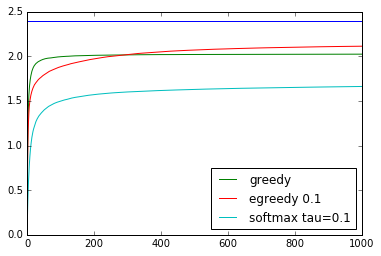

In [16]:
# -*- coding: UTF-8 -*-
import random, math
import matplotlib.pyplot as plt
%pylab inline --no-import-all
#initialize
class n_armed_bandit:
    n = 10 #arm
    time = 1000
    task = 2000
    q = []
    n_method = 3
    tau = 0.1
    Rt = []
    qm = 0
    
    def __init__(self):
        for i in range(self.n):
            self.q.append(random.gauss(0, 1))
        self.qm = max(self.q)
        self.Rt = [[[0.0 for i in range(self.time)] for j in range(self.task)] for k in range(self.n_method)]
        
    def random_pick(self, Probility_Variable, Probility):
        x = random.uniform(0, 1)
        cumu_prob = 0.0
        for item, prob in zip(Probility_Variable, Probility):
            cumu_prob += prob
            if x < cumu_prob :break
        return item

    def Qt(self, K_a, R_a, q_a):
        K_a += 1
        R_a += random.gauss(q_a, 1)
        Q_a = R_a/K_a
        return K_a, R_a, Q_a

    def greedy(self, t, task, method):
        K = [0.0]*self.n
        R = [0.0]*self.n
        Q = [0.0]*self.n
        for ti in range(t):
            if ti < 1:
                act = self.random_pick(range(10), [0.1]*10)
                K[act], R[act], Q[act] = self.Qt(K[act], R[act], self.q[act])
            else:
                act = Q.index(max(Q))#list index & max min
                K[act], R[act], Q[act] = self.Qt(K[act], R[act], self.q[act])
            self.Rt[method][task][ti] = sum(R)/(ti+1)

    def egreedy(self, t, e, task, method):
        K = [0.0]*self.n
        R = [0.0]*self.n
        Q = [0.0]*self.n
        for ti in range(t):
            if ti < 1 or self.random_pick([True, False],[e, 1-e]):
                act = self.random_pick(range(self.n), [1.0/self.n]*self.n)
                K[act], R[act], Q[act] = self.Qt(K[act], R[act], self.q[act])
            else:
                act = Q.index(max(Q))#list index & max min
                K[act], R[act], Q[act] = self.Qt(K[act], R[act], self.q[act])
            self.Rt[method][task][ti] = sum(R)/(ti+1)

    def softmax(self, t, task, method):
        K = [0.0]*self.n
        R = [0.0]*self.n
        Q = [0.0]*self.n
        Gibbs = [1.0/self.n]*self.n
        for ti in range(t):
            act = self.random_pick(range(self.n), Gibbs)
            K[act], R[act], Q[act] = self.Qt(K[act], R[act], self.q[act])
            Gibbs = self.calcGibbs(Q)
            self.Rt[method][task][ti] = sum(R)/(ti+1)
            
    def calcGibbs(self, Q):
        temp = [math.exp(Q[i]/self.tau) for i in range(self.n)]
        sumt = sum(temp)
        G = [temp[i]/sumt for i in range(self.n)]
        return G
#a_elements = range(10)
#A = []#elements of A is the action chosen #A[t]
#K = [0.0]*10 # K(a) counter of action a
#R = [0.0]*10 # R(a) sum of the reward of a
#Q = [0.0]*10 

 
e = 0.1
         
        

solver = n_armed_bandit()
#using greedy method
for k in range(solver.task):    
    solver.greedy(solver.time, k, 0)

    solver.egreedy(solver.time, 0.1, k, 1)

    solver.softmax(solver.time, k, 2)
    

for method_ in range(solver.n_method):
    for ti in range(solver.time):
        for task_ in range(1,solver.task):
            solver.Rt[method_][0][ti] += solver.Rt[method_][task_][ti]
        solver.Rt[method_][0][ti] = solver.Rt[method_][0][ti]/solver.task

plt.plot(range(solver.time), [solver.qm]*solver.time)
plt.plot(range(solver.time), solver.Rt[0][0][:], label = "greedy")
plt.plot(range(solver.time), solver.Rt[1][0][:], label = "egreedy 0.1")
plt.plot(range(solver.time), solver.Rt[2][0][:], label = "softmax tau=0.1")


plt.legend(loc="lower right")

###  (6) Incremental Implementation (Change the algorithm of $Q_t(a)$)

Populating the interactive namespace from numpy and matplotlib


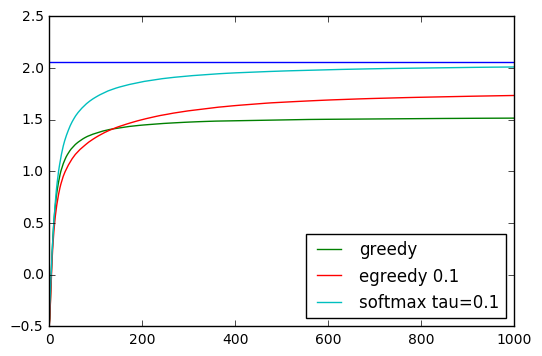

In [4]:
# -*- coding: UTF-8 -*-
import random, math
import matplotlib.pyplot as plt
%pylab inline --no-import-all
#initialize
class n_armed_bandit:
    n = 10 #arm
    time = 1000
    task = 2000
    q = []
    n_method = 3
    tau = 0.1
    Rt = []
    qm = 0
    
    def __init__(self):
        for i in range(self.n):
            self.q.append(random.gauss(0, 1))
        self.qm = max(self.q)
        self.Rt = [[[0.0 for i in range(self.time)] for j in range(self.task)] for k in range(self.n_method)]
        
    def random_pick(self, Probility_Variable, Probility):
        x = random.uniform(0, 1)
        cumu_prob = 0.0
        for item, prob in zip(Probility_Variable, Probility):
            cumu_prob += prob
            if x < cumu_prob :break
        return item

    def Qt(self, K_a, Q_a ,q_a):
        K_a += 1
        R_a = random.gauss(q_a, 1)
        Q_a = Q_a + (R_a - Q_a)/K_a
        return K_a, Q_a, R_a

    def greedy(self, t, task, method):
        K = [0.0]*self.n
        Q = [0.0]*self.n
        R = 0.0
        for ti in range(t):
            if ti < 1:
                act = self.random_pick(range(10), [0.1]*10)
                K[act], Q[act], r = self.Qt(K[act], Q[act], self.q[act])
            else:
                act = Q.index(max(Q))#list index & max min
                K[act], Q[act], r = self.Qt(K[act], Q[act], self.q[act])
            R += r
            self.Rt[method][task][ti] = R/(ti+1)

    def egreedy(self, t, e, task, method):
        K = [0.0]*self.n
        Q = [0.0]*self.n
        R = 0.0
        for ti in range(t):
            if ti < 1 or self.random_pick([True, False],[e, 1-e]):
                act = self.random_pick(range(self.n), [1.0/self.n]*self.n)
                K[act], Q[act], r = self.Qt(K[act], Q[act], self.q[act])
            else:
                act = Q.index(max(Q))#list index & max min
                K[act], Q[act], r = self.Qt(K[act], Q[act], self.q[act])
            R += r
            self.Rt[method][task][ti] = R/(ti+1)

    def softmax(self, t, task, method):
        K = [0.0]*self.n
        Q = [0.0]*self.n
        R = 0.0
        Gibbs = [1.0/self.n]*self.n
        for ti in range(t):
            act = self.random_pick(range(self.n), Gibbs)
            K[act], Q[act], r = self.Qt(K[act], Q[act], self.q[act])
            Gibbs = self.calcGibbs(Q)
            R += r
            self.Rt[method][task][ti] = R/(ti+1)
            
    def calcGibbs(self, Q):
        temp = [math.exp(Q[i]/self.tau) for i in range(self.n)]
        sumt = sum(temp)
        G = [temp[i]/sumt for i in range(self.n)]
        return G
#a_elements = range(10)
#A = []#elements of A is the action chosen #A[t]
#K = [0.0]*10 # K(a) counter of action a
#R = [0.0]*10 # R(a) sum of the reward of a
#Q = [0.0]*10 

 
e = 0.1
         
        

solver = n_armed_bandit()
#using greedy method
for k in range(solver.task):    
    solver.greedy(solver.time, k, 0)

    solver.egreedy(solver.time, 0.1, k, 1)

    solver.softmax(solver.time, k, 2)
    

for method_ in range(solver.n_method):
    for ti in range(solver.time):
        for task_ in range(1,solver.task):
            solver.Rt[method_][0][ti] += solver.Rt[method_][task_][ti]
        solver.Rt[method_][0][ti] = solver.Rt[method_][0][ti]/solver.task

plt.plot(range(solver.time), [solver.qm]*solver.time)
plt.plot(range(solver.time), solver.Rt[0][0][:], label = "greedy")
plt.plot(range(solver.time), solver.Rt[1][0][:], label = "egreedy 0.1")
plt.plot(range(solver.time), solver.Rt[2][0][:], label = "softmax tau=0.1")


plt.legend(loc="lower right")